#Lab 8 by Sughandhan S, 111901049

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import heapq

#Q1) Breadth First Search

In [ ]:
def BFS(n):
  grid = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      grid[i][j] = 6
  block_loc = []
  print("Number of block states")
  bn = int(input())
  for i in range(bn):
    print("Enter location for block state (x,y)")
    x = int(input())
    y = int(input())
    block_loc.append([x,y])
    grid[x][y] = -1
  print("Starting coordinate (x,y)")
  x_start = int(input( )) 
  y_start =  int(input( )) 
  start = [x_start, y_start]
  grid[x_start][y_start] = 0
  print("Number of goal states")
  gn = int(input())
  #goal tracker
  gt = 1
  goals=[]
  for i in range(gn):
    print("Enter location for goal state (x,y)")
    gx = int(input())
    gy = int(input())
    goals.append([gx, gy])
    grid[gx][gy] = 1
  
  #predecessor matrix
  pred_mat = np.zeros([n,n])
  pred_mat[x_start][y_start] = -1

  priority_queue = []
  priority_queue.append(start)
  explored_list=[]
  cur=[]
  print(grid)
  #plotting grid
  cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'purple'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.matshow(grid, cmap = cmap, norm = norm)
  while len(priority_queue)>0 and gt<=1: #gn

    #algo starts here
    cur = priority_queue.pop(0)
    explored_list.append(cur)
    if grid[cur[0]][cur[1]] ==1:
      grid[cur[0]][cur[1]] = 2
      x_new = cur[0]
      y_new = cur[1]
      print("YAAAY GOAL REACHED!")
      gt += 1
    else:
      grid[cur[0]][cur[1]] = 2

    print(grid)
    #plotting grid
    cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'purple'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    plt.matshow(grid, cmap = cmap, norm = norm)
    plt.show()

    #moving right
    if cur[0]<n and cur[1]+1<n and cur[0]>=0 and cur[1]+1>=0:
      x_new = cur[0]
      y_new = cur[1]+1
      
      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        grid[x_new][y_new] = 1
        priority_queue.append([x_new, y_new])

      #if point is unexpolored
      elif grid[x_new][y_new]==6 : 
        priority_queue.append([x_new, y_new])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
    
    #moving up
    if cur[0]-1<n and cur[1]<n and cur[0]-1>=0 and cur[1]>=0:
      x_new = cur[0]-1
      y_new = cur[1]

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        grid[x_new][y_new] = 1
        priority_queue.append([x_new, y_new])

      #if point is unexpolored
      elif grid[x_new][y_new]==6: 
        priority_queue.append([x_new, y_new])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]

    #moving left
    if cur[0]<n and cur[1]-1<n and cur[0]>=0 and cur[1]-1>=0:
      x_new = cur[0]
      y_new = cur[1]-1

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        priority_queue.append([x_new, y_new])

      
      #if point is unexpolored
      elif grid[x_new][y_new]==6:
        priority_queue.append([x_new, y_new])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]

    #moving down
    if cur[0]+1<n and cur[1]<n and cur[0]+1>=0 and cur[1]>=0:
      x_new = cur[0]+1
      y_new = cur[1]

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        priority_queue.append([x_new, y_new])

      #if point is unexpolored
      elif grid[x_new][y_new]==6: 
        priority_queue.append([x_new, y_new])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
  
  print(grid)
  cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'purple'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.matshow(grid, cmap = cmap, norm = norm)
  plt.show()
  
  for i in goals:
    x_temp = int(i[0])
    y_temp = int(i[1]) 
  
    for i in range(n):
      for j in range(n):
        pred_mat[i][j] = int(pred_mat[i][j])
    print("Path to goal from source")
    while pred_mat[x_temp][y_temp]!=-1:
      print(x_temp,",", y_temp,"<=")
      tempo = int(pred_mat[x_temp][y_temp])
      x_temp = int(tempo/n)
      y_temp = int(tempo%n)
    print(x_temp,",", y_temp)
    print(" ")
    action = { "right" , "up", "down", "left" }
  return grid


In [ ]:
n = int(input())

5


Number of block states
2
Enter location for block state (x,y)
0
3
Enter location for block state (x,y)
2
2
Starting coordinate (x,y)
4
0
Number of goal states
2
Enter location for goal state (x,y)
2
3
Enter location for goal state (x,y)
4
4
[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 0.  6.  6.  6.  1.]]
[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 2.  6.  6.  6.  1.]]


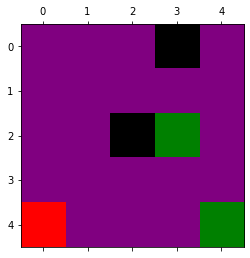

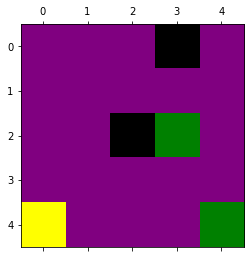

[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  1.  6.]
 [ 3.  6.  6.  6.  6.]
 [ 2.  2.  6.  6.  1.]]


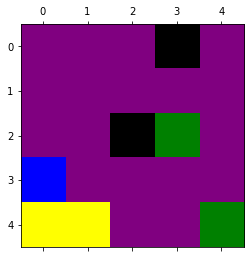

[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  2.  3.  6.  1.]]


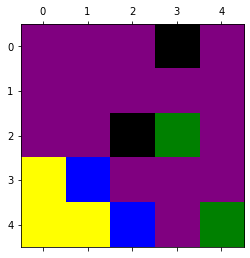

[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 3.  6. -1.  1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  2.  2.  6.  1.]]


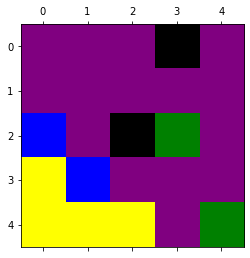

[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 3.  6. -1.  1.  6.]
 [ 2.  2.  3.  6.  6.]
 [ 2.  2.  2.  3.  1.]]


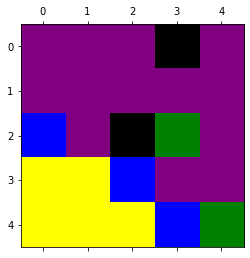

[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 2.  3. -1.  1.  6.]
 [ 2.  2.  3.  6.  6.]
 [ 2.  2.  2.  3.  1.]]


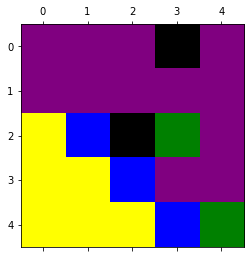

[[ 6.  6.  6. -1.  6.]
 [ 3.  6.  6.  6.  6.]
 [ 2.  3. -1.  1.  6.]
 [ 2.  2.  3.  6.  6.]
 [ 2.  2.  2.  2.  1.]]


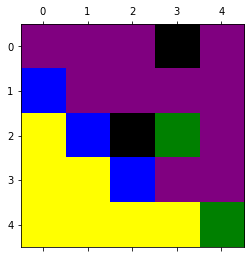

[[ 6.  6.  6. -1.  6.]
 [ 3.  6.  6.  6.  6.]
 [ 2.  3. -1.  1.  6.]
 [ 2.  2.  2.  3.  6.]
 [ 2.  2.  2.  2.  1.]]


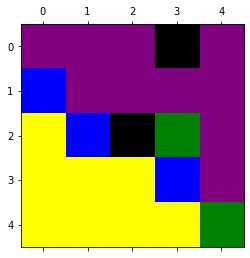

[[ 6.  6.  6. -1.  6.]
 [ 3.  6.  6.  6.  6.]
 [ 2.  2. -1.  1.  6.]
 [ 2.  2.  2.  3.  6.]
 [ 2.  2.  2.  2.  1.]]


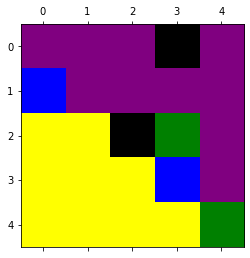

[[ 6.  6.  6. -1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  2. -1.  1.  6.]
 [ 2.  2.  2.  3.  6.]
 [ 2.  2.  2.  2.  1.]]


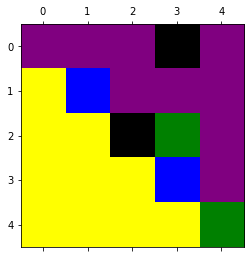

YAAAY GOAL REACHED!
[[ 3.  6.  6. -1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  2. -1.  1.  6.]
 [ 2.  2.  2.  3.  6.]
 [ 2.  2.  2.  2.  2.]]


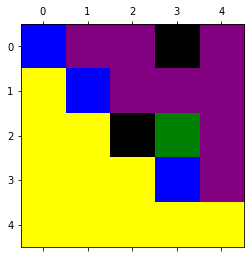

[[ 3.  6.  6. -1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  2. -1.  1.  6.]
 [ 2.  2.  2.  3.  3.]
 [ 2.  2.  2.  2.  2.]]


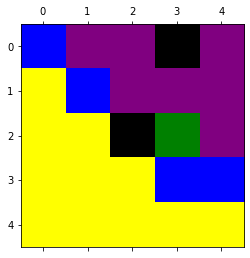

Path to goal from source
2 , 3 <=
0 , 0 <=
1 , 0 <=
2 , 0 <=
3 , 0 <=
4 , 0
 
Path to goal from source
4 , 4 <=
4 , 3 <=
4 , 2 <=
4 , 1 <=
4 , 0
 


In [ ]:
gg=BFS(n)

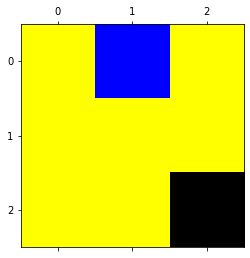

In [ ]:
#blocked = -1, start = 0, goal=1, explored = 2, frontier = 3, unvisited =6 
cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'indigo'])
bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.matshow(gg, cmap = cmap, norm = norm)

In [ ]:
5%3

2

In [ ]:
int(2/3)

0

In [ ]:
2/(int(3))

0.6666666666666666

In [ ]:
haha = np.zeros(n*n)
haha

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
haha[int(2.0)]

0.0

In [ ]:
100

#Q2) DFS

In [ ]:
def DFS(n):
  grid = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      grid[i][j] = 6
  block_loc = []
  print("Number of block states")
  bn = int(input())
  for i in range(bn):
    print("Enter location for block state (x,y)")
    x = int(input())
    y = int(input())
    block_loc.append([x,y])
    grid[x][y] = -1
  print("Starting coordinate (x,y)")
  x_start = int(input( )) 
  y_start =  int(input( )) 
  start = [x_start, y_start]
  grid[x_start][y_start] = 0
  print("Number of goal states")
  gn = int(input())
  #goal tracker
  gt = 1
  goals=[]
  for i in range(gn):
    print("Enter location for goal state (x,y)")
    gx = int(input())
    gy = int(input())
    goals.append([gx, gy])
    grid[gx][gy] = 1
  
  #predecessor matrix
  pred_mat = np.zeros([n,n])
  pred_mat[x_start][y_start] = -1

  priority_queue = []
  priority_queue.append(start)
  explored_list=[]
  cur=[]
  print(grid)
  #plotting grid
  cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'purple'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.matshow(grid, cmap = cmap, norm = norm)
  while len(priority_queue)>0 and gt<=1:#gn:

    #algo starts here
    l = len(priority_queue)
    cur = priority_queue.pop(l-1)
    explored_list.append(cur)
    if grid[cur[0]][cur[1]] ==1:
      grid[cur[0]][cur[1]] = 2
      x_new = cur[0]
      y_new = cur[1]
      print("YAAAY GOAL REACHED!")
      #break
      gt += 1
    else:
      grid[cur[0]][cur[1]] = 2

    print(grid)
    #plotting grid
    cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'purple'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    plt.matshow(grid, cmap = cmap, norm = norm)
    plt.show()

    #moving right
    if cur[0]<n and cur[1]+1<n and cur[0]>=0 and cur[1]+1>=0:
      x_new = cur[0]
      y_new = cur[1]+1
      
      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        grid[x_new][y_new] = 1
        priority_queue.append([x_new, y_new])


      #if point is unexpolored
      elif grid[x_new][y_new]==6 : 
        priority_queue.append([x_new, y_new])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
    
    #moving up
    if cur[0]-1<n and cur[1]<n and cur[0]-1>=0 and cur[1]>=0:
      x_new = cur[0]-1
      y_new = cur[1]

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        grid[x_new][y_new] = 1
        priority_queue.append([x_new, y_new])

      #if point is unexpolored
      elif grid[x_new][y_new]==6: 
        priority_queue.append([x_new, y_new])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]

    #moving left
    if cur[0]<n and cur[1]-1<n and cur[0]>=0 and cur[1]-1>=0:
      x_new = cur[0]
      y_new = cur[1]-1

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        priority_queue.append([x_new, y_new])

      
      #if point is unexpolored
      elif grid[x_new][y_new]==6:
        priority_queue.append([x_new, y_new])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]

    #moving down
    if cur[0]+1<n and cur[1]<n and cur[0]+1>=0 and cur[1]>=0:
      x_new = cur[0]+1
      y_new = cur[1]

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        priority_queue.append([x_new, y_new])

      #if point is unexpolored
      elif grid[x_new][y_new]==6: 
        priority_queue.append([x_new, y_new]) 
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
  
  
  print(grid)
  cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'purple'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.matshow(grid, cmap = cmap, norm = norm)
  plt.show()
    
  for i in goals:
    x_temp = int(i[0]) 
    y_temp = int(i[1]) 
    
    for i in range(n):
      for j in range(n):
        pred_mat[i][j] = int(pred_mat[i][j])
    print("Path to goal from source")
    while pred_mat[x_temp][y_temp]!=-1:
      print(x_temp,",", y_temp,"<=")
      tempo = int(pred_mat[x_temp][y_temp])
      x_temp = int(tempo/n)
      y_temp = int(tempo%n)
    print(x_temp,",", y_temp)
    print(" ")
    action = { "right" , "up", "down", "left" }
  return grid
 

In [ ]:
n = int(input())

5


Number of block states
2
Enter location for block state (x,y)
0
3
Enter location for block state (x,y)
2
2
Starting coordinate (x,y)
4
0
Number of goal states
2
Enter location for goal state (x,y)
2
3
Enter location for goal state (x,y)
4
4
[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 0.  6.  6.  6.  1.]]
[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 2.  6.  6.  6.  1.]]


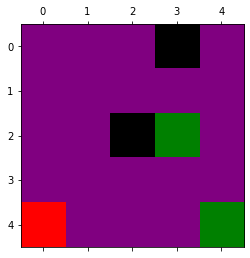

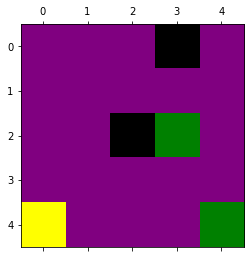

[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  1.  6.]
 [ 2.  6.  6.  6.  6.]
 [ 2.  3.  6.  6.  1.]]


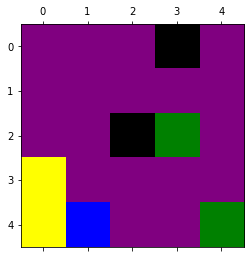

[[ 6.  6.  6. -1.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 2.  6. -1.  1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3.  6.  6.  1.]]


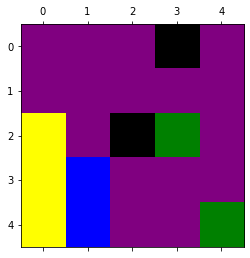

[[ 6.  6.  6. -1.  6.]
 [ 2.  6.  6.  6.  6.]
 [ 2.  3. -1.  1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3.  6.  6.  1.]]


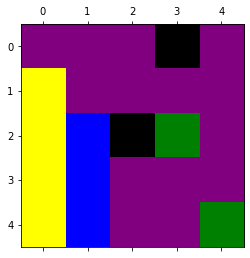

[[ 2.  6.  6. -1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3. -1.  1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3.  6.  6.  1.]]


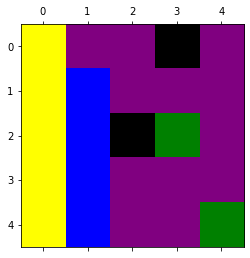

[[ 2.  2.  6. -1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3. -1.  1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3.  6.  6.  1.]]


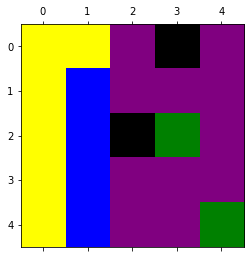

[[ 2.  2.  2. -1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3. -1.  1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3.  6.  6.  1.]]


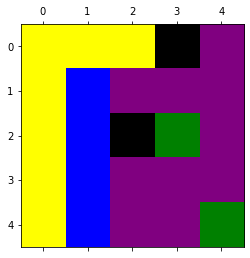

[[ 2.  2.  2. -1.  6.]
 [ 2.  3.  2.  6.  6.]
 [ 2.  3. -1.  1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3.  6.  6.  1.]]


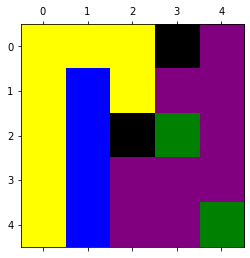

[[ 2.  2.  2. -1.  6.]
 [ 2.  3.  2.  2.  6.]
 [ 2.  3. -1.  1.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3.  6.  6.  1.]]


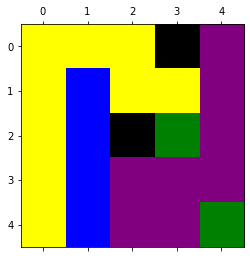

YAAAY GOAL REACHED!
[[ 2.  2.  2. -1.  6.]
 [ 2.  3.  2.  2.  3.]
 [ 2.  3. -1.  2.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 2.  3.  6.  6.  1.]]


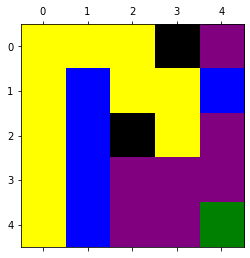

[[ 2.  2.  2. -1.  6.]
 [ 2.  3.  2.  2.  3.]
 [ 2.  3. -1.  2.  3.]
 [ 2.  3.  6.  3.  6.]
 [ 2.  3.  6.  6.  1.]]


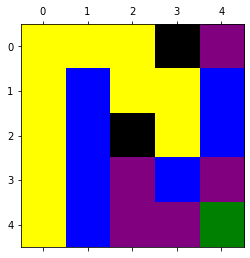

Path to goal from source
2 , 3 <=
1 , 3 <=
1 , 2 <=
0 , 2 <=
0 , 1 <=
0 , 0 <=
1 , 0 <=
2 , 0 <=
3 , 0 <=
4 , 0
 
Path to goal from source
4 , 4 <=
0 , 0 <=
1 , 0 <=
2 , 0 <=
3 , 0 <=
4 , 0
 


array([[ 2.,  2.,  2., -1.,  6.],
       [ 2.,  3.,  2.,  2.,  3.],
       [ 2.,  3., -1.,  2.,  3.],
       [ 2.,  3.,  6.,  3.,  6.],
       [ 2.,  3.,  6.,  6.,  1.]])

In [ ]:
DFS(n)

#Q3) 7 Puzzle Solver using Heuristics


In [ ]:
# 0 -> indicates empty slots
#initial_state = np.array([[1,2,3],[4,0,0],[7,6,5]])
initial_state = np.array([[1,2,3],[4,5,6],[0,7,0]])
final_state = np.array([[1,2,3],[4,5,6],[7,0,0]])

In [ ]:
print(initial_state.shape)
dd = initial_state
print(dd)
print(dd.shape)

(3, 3)
[[1 2 3]
 [4 5 6]
 [0 7 0]]
(3, 3)


In [ ]:
print(final_state)
print(initial_state)

[[1 2 3]
 [4 5 6]
 [7 0 0]]
[[1 2 3]
 [4 5 6]
 [0 7 0]]


In [ ]:
final_state

array([[1, 2, 3],
       [4, 5, 6],
       [7, 0, 0]])

In [ ]:
#final_state not required
def manhattan_dis(cur, final):
  c=0
  for i in range(3):
    for j in range(3):
      # print(final[i][j])
      # print(cur[i][j])
      target = cur[i][j]
      if target ==0:
        continue
      target -=1
      x_goal = int(target/3)
      y_goal = int(target%3)
      c += abs(i - x_goal) + abs(j - y_goal)
  return c

In [ ]:
print(initial_state)
print(final_state)
cost = manhattan_dis(initial_state, final_state)

[[1 2 3]
 [4 5 6]
 [0 7 0]]
[[1 2 3]
 [4 5 6]
 [7 0 0]]


In [ ]:
cost

1

In [ ]:
def swap(x, y):
  return y,x

Every time i change  temp1 or temp 2 etc it also changes puzzle!!!! WHY????

In [ ]:
def puzzle_sol(initial, final_state):
  prev_state=[]
  #print(initial)
  puzzle = np.zeros([3,3])
  state =[]
  for i in range(3):
    for j in range(3):
      state.append(initial[i][j])
      puzzle[i][j] = initial[i][j]
  prev_state.append(state)
  print(prev_state)
  emp = []
  #finding out the empty locations
  for i in range(3):
    for j in range(3):
      if puzzle[i][j]==0:
        emp.append([i,j])
  
  print("This is the INITIAL STATE")
  print(" ")
  print(puzzle)
  print(" ")
  print(" LETS BEGIN SOLVING THE PUZZLE")
  print(" ")
  step = 0
  n=6
  prev_state=[]
  while manhattan_dis(puzzle, final_state)!=0:# and n>0:
    #list to store costs 
    cost_list = []
    # to keep track of which indexed empty slot
    count = 0
    print(emp)
    for p in emp:

      temp1 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp1[i][j] = puzzle[i][j]     
    
      x = p[0]
      y = p[1]  

      #up
      new_x = x-1
      new_y = y
      if new_x>=0 and temp1[new_x][new_y]!=0:
        inter = temp1[x][y]
        temp1[x][y] = temp1[new_x][new_y] 
        temp1[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp1[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in prev_state:
          if i == check_state:
            flag = 1
            break
        if flag==0:
          man_cost = manhattan_dis(temp1, final_state)
          cost_list.append([man_cost, count, "up"])
        #print("check 1,")
        #print( temp1 )
        #print(puzzle)
      
      temp2 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp2[i][j] = puzzle[i][j]
      
      x = p[0]
      y = p[1]
      #down
      new_x = x+1
      new_y = y
      if new_x<3 and temp2[new_x][new_y]!=0:
        inter = temp2[x][y]
        temp2[x][y] = temp2[new_x][new_y] 
        temp2[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp2[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in prev_state:
          if i == check_state:
            flag = 1
            break
        if flag==0:
          man_cost = manhattan_dis(temp2, final_state)
          cost_list.append([man_cost, count, "down"])
        #print("check 2,")
        #print( temp2 )
        #print(puzzle)


      temp3 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp3[i][j] = puzzle[i][j]

      x = p[0]
      y = p[1]
      #left
      new_x = x
      new_y = y-1
      if new_y>=0 and temp3[new_x][new_y]!=0:
        inter = temp3[x][y]
        temp3[x][y] = temp3[new_x][new_y] 
        temp3[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp3[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in prev_state:
          if i == check_state:
            flag = 1
            break
        if flag==0:
          man_cost = manhattan_dis(temp3, final_state)
          cost_list.append([man_cost, count, "left"])
        #print("check 3,")
        #print( temp3 )
        #print(puzzle)
      
      temp4 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp4[i][j] = puzzle[i][j]

      x = p[0]
      y = p[1]
      #right
      new_x = x
      new_y = y+1
      if new_y<3 and temp4[new_x][new_y]!=0:
        inter = temp4[x][y]
        temp4[x][y] = temp4[new_x][new_y] 
        temp4[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp4[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in prev_state:
          if i == check_state:
            flag = 1
            break
        if flag==0:
          man_cost = manhattan_dis(temp4, final_state)
          cost_list.append([man_cost, count, "right"])
        #print("check 4,")
        #print( temp4 )
        #print(puzzle)

      count += 1
    
    cost_list.sort()
    least = cost_list[0]
    emp_slot = emp[least[1]]
    move =  least[2]
    
    #print("check 5,")
    #print( temp4 )
    print(puzzle)
    emp_x = emp_slot[0]
    emp_y = emp_slot[1]

    temp_z = np.zeros([3,3])
    for i in range(3):
      for j in range(3):
        temp_z[i][j] = puzzle[i][j]

    print(cost_list)

    if move =="up":
      x_next = emp_x-1
      y_next = emp_y
      inter = puzzle[x_next][y_next]
      puzzle[x_next][y_next] = temp_z[emp_x][emp_y] 
      puzzle[emp_x][emp_y] = inter
      emp[least[1]][0] = x_next
      emp[least[1]][1] = y_next
      #print("check 6")
      print(puzzle)
      state =[]
      for i in range(3):
        for j in range(3):
          state.append(puzzle[i][j])
      prev_state.append(state)

    elif move =="down":
      x_next = emp_x+1
      y_next = emp_y
      inter = puzzle[x_next][y_next]
      puzzle[x_next][y_next] = temp_z[emp_x][emp_y] 
      puzzle[emp_x][emp_y] = inter
      emp[least[1]][0] = x_next
      emp[least[1]][1] = y_next
      #print("check 7")
      print(puzzle)
      state =[]
      for i in range(3):
        for j in range(3):
          state.append(puzzle[i][j])
      prev_state.append(state)

    elif move == "left":
      x_next = emp_x
      y_next = emp_y-1
      inter = puzzle[x_next][y_next]
      puzzle[x_next][y_next] = temp_z[emp_x][emp_y] 
      puzzle[emp_x][emp_y] = inter
      emp[least[1]][0] = x_next
      emp[least[1]][1] = y_next
      #print("check 8")
      print(puzzle)
      state =[]
      for i in range(3):
        for j in range(3):
          state.append(puzzle[i][j])
      prev_state.append(state)

    elif move == "right":
      x_next = emp_x
      y_next = emp_y+1
      inter = puzzle[x_next][y_next]
      puzzle[x_next][y_next] = temp_z[emp_x][emp_y] 
      puzzle[emp_x][emp_y] = inter
      emp[least[1]][0] = x_next
      emp[least[1]][1] = y_next
      #print("check 9")
      print(puzzle)
      state =[]
      for i in range(3):
        for j in range(3):
          state.append(puzzle[i][j])
      prev_state.append(state)

    # print(cost_list)
    initial = puzzle
    step += 1
    print("Step number : ", step)
    print(" ")
    print(puzzle)
    print(" ")
    n -=1

  print("Step number : ", step)
  print(" ")
  print(puzzle)
  print(" ")
  print(emp)
  # for i in emp:
  #   print(i[0])
  #   print(i[1])



In [ ]:
# 0 -> indicates empty slots
#initial_state = np.array([[1,2,3],[4,0,0],[7,6,5]])   
#initial_state = np.array([[1,0,3],[4,2,6],[7,5,0]])

#initial_state = np.array([[3,2,1],[6,5,4],[0,0,7]])
initial_state = np.array([[2,6,0],[4,7,3],[5,0,1]])
final_state = np.array([[1,2,3],[4,5,6],[7,0,0]])

In [ ]:
puzzle_sol(initial_state, final_state)

[[2, 6, 0, 4, 7, 3, 5, 0, 1]]
This is the INITIAL STATE
 
[[2. 6. 0.]
 [4. 7. 3.]
 [5. 0. 1.]]
 
 LETS BEGIN SOLVING THE PUZZLE
 
[[0, 2], [2, 1]]
[[2. 6. 0.]
 [4. 7. 3.]
 [5. 0. 1.]]
[[11, 0, 'down'], [11, 0, 'left'], [11, 1, 'left'], [11, 1, 'right'], [11, 1, 'up']]
[[2. 6. 3.]
 [4. 7. 0.]
 [5. 0. 1.]]
Step number :  1
 
[[2. 6. 3.]
 [4. 7. 0.]
 [5. 0. 1.]]
 
[[1, 2], [2, 1]]
[[2. 6. 3.]
 [4. 7. 0.]
 [5. 0. 1.]]
[[10, 0, 'down'], [10, 1, 'left'], [10, 1, 'right'], [10, 1, 'up'], [12, 0, 'left'], [12, 0, 'up']]
[[2. 6. 3.]
 [4. 7. 1.]
 [5. 0. 0.]]
Step number :  2
 
[[2. 6. 3.]
 [4. 7. 1.]
 [5. 0. 0.]]
 
[[2, 2], [2, 1]]
[[2. 6. 3.]
 [4. 7. 1.]
 [5. 0. 0.]]
[[9, 1, 'left'], [9, 1, 'up']]
[[2. 6. 3.]
 [4. 7. 1.]
 [0. 5. 0.]]
Step number :  3
 
[[2. 6. 3.]
 [4. 7. 1.]
 [0. 5. 0.]]
 
[[2, 2], [2, 0]]
[[2. 6. 3.]
 [4. 7. 1.]
 [0. 5. 0.]]
[[10, 0, 'left'], [10, 0, 'up'], [10, 1, 'up']]
[[2. 6. 3.]
 [4. 7. 1.]
 [0. 0. 5.]]
Step number :  4
 
[[2. 6. 3.]
 [4. 7. 1.]
 [0. 0. 5.]]
 
[[2, 1], [

#Q3) 7 Puzzle Solver using BFS

node structure : [1D list of the config, current counter, parent counter]

In [ ]:
def puzzle_solve(initial, final_state):
  ## inputs are 2d lists
  goal_state = []
  for w in range(3):
    for e in range(3):
      goal_state.append(final_state[w][e])
  print("This is the INITIAL STATE")
  print(" ")
  print(np.array(initial))
  print(" ")
  print(" LETS BEGIN SOLVING THE PUZZLE")
  print(" ")
  ini_list = []
  
  for w in range(3):
    for e in range(3):
      ini_list.append(initial[w][e])

  frontier = []
  counter = 0
  #heapq.heappush(frontier, [0, "nothing", ini_list,counter, -1 ] )
  heapq.heappush(frontier, [ini_list,counter, -1 ] )
  reached = 0
  explored_list=[]
  dist =0
  step_count=0
  while len(frontier)>0 :
    step_count+=1
    print(step_count)
          ## We will dist to keep track of predecessors
    #dist+=1
    current_node = heapq.heappop(frontier)
    # [current_state, counter val, pred val]
    #current_node= current_node[1:]
    # current state
    cur_puzzle = current_node[0]
    #counter val
    #cur_counter = dist
    #counter val
    prev_counter = current_node[1]
    #appending NODE to explored lists
    explored_list.append(current_node)
    puzzle = np.zeros([3,3])
    #list for storing empty spaces

    if cur_puzzle == goal_state:
      reached = 1
      continue

    emp = []
    for i in range(3):
      for j in range(3):
        l= 3*i+j
        puzzle[i][j] = cur_puzzle[l]
        if puzzle[i][j]==0:
          emp.append([i,j])
    #print(emp)
    for p in emp:

      temp1 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp1[i][j] = puzzle[i][j]     
    
      x = p[0]
      y = p[1]  
      
      #up
                    #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x-1
      new_y = y
      if new_x>=0 and temp1[new_x][new_y]!=0:
        num = temp1[new_x][new_y]
        inter = temp1[x][y]
        temp1[x][y] = temp1[new_x][new_y] 
        temp1[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp1[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in explored_list:
          if i[0] == check_state:
            flag = 1
            break
        if flag==0:
          #heapq.heappush(frontier, [man_cost+ gofn, "up", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "up", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          heapq.heappush(frontier, [check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          if check_state == goal_state:
            explored_list.append([check_state, dist, prev_counter])
            reached=1
            print("REACHED")
            break
        #print("check 1,")
        #print( temp1 )
        #print(puzzle)
      
      temp2 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp2[i][j] = puzzle[i][j]     
      
      x = p[0]
      y = p[1]
      #down
                #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x+1
      new_y = y
      if new_x<3 and temp2[new_x][new_y]!=0:
        num = temp2[new_x][new_y]
        inter = temp2[x][y]
        temp2[x][y] = temp2[new_x][new_y] 
        temp2[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp2[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in explored_list:
          if i[0] == check_state:
            flag = 1
            break
        if flag==0:
          #heapq.heappush(frontier, [man_cost+ gofn, "down", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "down", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          heapq.heappush(frontier, [ check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          #print(temp2)
          if check_state == goal_state:
            explored_list.append([check_state, dist, prev_counter])
            reached=1
            print("REACHED")
            break
        #print("check 2,")
        #print( temp2 )
        #print(puzzle)


      temp3 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp3[i][j] = puzzle[i][j]     

      x = p[0]
      y = p[1]
      #left
              #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x
      new_y = y-1
      if new_y>=0 and temp3[new_x][new_y]!=0:
        num = temp3[new_x][new_y]
        inter = temp3[x][y]
        temp3[x][y] = temp3[new_x][new_y] 
        temp3[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp3[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in explored_list:
          if i[0] == check_state:
            flag = 1
            break
        if flag==0:
          #heapq.heappush(frontier, [man_cost+ gofn, "left", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "left", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          heapq.heappush(frontier, [ check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          #print(temp3)
          if check_state == goal_state:
            explored_list.append([check_state, dist, prev_counter])
            reached=1
            print("REACHED")
            break
        #print("check 3,")
        #print( temp3 )
        #print(puzzle)
      
      temp4 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp4[i][j] = puzzle[i][j]     

      x = p[0]
      y = p[1]
      #right
                    #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x
      new_y = y+1
      if new_y<3 and temp4[new_x][new_y]!=0:
        num = temp4[new_x][new_y]
        inter = temp4[x][y]
        temp4[x][y] = temp4[new_x][new_y] 
        temp4[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp4[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in explored_list:
          if i[0] == check_state:
            flag = 1
            break
        if flag==0:
          #heapq.heappush(frontier, [man_cost+ gofn, "right", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "right", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          heapq.heappush(frontier, [ check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          #print(temp4)
          if check_state == goal_state:
            explored_list.append([check_state, dist, prev_counter])
            reached=1
            print("REACHED")
            break
    
    #goal state has been reached
    if reached==1:
      break;
    
        #print("check 4,")
        #print( temp4 )
        #print(puzzle)
      #count += 1
      n-=1

  print(len(frontier))
  print(len(explored_list))

  goal_node = explored_list[-1]
  pointer = goal_node[2]
  print("Steps to the solution")
  config = goal_node[0]
  puz = np.zeros([3,3])
  for r in range(3):
    for m in range(3):
      k= 3*r+m
      puz[r][m] =config[k] 
  #print(puz)
  path=[]
  path.append(puz)
  while pointer!=-1:
    for node in explored_list:
      if node[1]==pointer:
        pointer = node[2]
        tempo = node[0]
        puz = np.zeros([3,3])
        for r in range(3):
          for m in range(3):
            k= 3*r+m
            puz[r][m] = tempo[k]
        #print(puz)
        path.append(puz)
  path.reverse()
  h = len(path)
  step_size=0
  for g in path:
    if step_size==0:
      print("Starting State")
    else:
      print("Step", step_size)
    print(g)
    step_size += 1
    print(" ")
  print("Total steps taken", h-1)

In [ ]:
#0 -> indicates empty slots
#initial_state = np.array([[1,2,3],[4,5,6],[0,7,0]])   
#initial_state = np.array([[1,0,3],[4,2,6],[7,5,0]])
#initial_state = np.array([[1,0,3],[4,2,5],[7,6,0]])
#initial_state = np.array([[3,2,1],[6,5,4],[0,0,7]])
#initial_state = np.array([[3,2,1],[6,5,4],[0,0,7]])
initial_state = np.array([[2,6,0],[4,3,7],[5,0,1]])
final_state = np.array([[1,2,3],[4,5,6],[7,0,0]])

In [ ]:
puzzle_solve(initial_state, final_state)

Streaming output truncated to the last 5000 lines.
93924
93925
93926
93927
93928
93929
93930
93931
93932
93933
93934
93935
93936
93937
93938
93939
93940
93941
93942
93943
93944
93945
93946
93947
93948
93949
93950
93951
93952
93953
93954
93955
93956
93957
93958
93959
93960
93961
93962
93963
93964
93965
93966
93967
93968
93969
93970
93971
93972
93973
93974
93975
93976
93977
93978
93979
93980
93981
93982
93983
93984
93985
93986
93987
93988
93989
93990
93991
93992
93993
93994
93995
93996
93997
93998
93999
94000
94001
94002
94003
94004
94005
94006
94007
94008
94009
94010
94011
94012
94013
94014
94015
94016
94017
94018
94019
94020
94021
94022
94023
94024
94025
94026
94027
94028
94029
94030
94031
94032
94033
94034
94035
94036
94037
94038
94039
94040
94041
94042
94043
94044
94045
94046
94047
94048
94049
94050
94051
94052
94053
94054
94055
94056
94057
94058
94059
94060
94061
94062
94063
94064
94065
94066
94067
94068
94069
94070
94071
94072
94073
94074
94075
94076
94077
94078
94079
94080
94081
9

#Q3) USING BFS

In [41]:
def puzzle_solve(initial, final_state):
  ## inputs are 2d lists
  goal_state = []
  for w in range(3):
    for e in range(3):
      goal_state.append(final_state[w][e])
  print("This is the INITIAL STATE")
  print(" ")
  print(np.array(initial))
  print(" ")
  print(" LETS BEGIN SOLVING THE PUZZLE")
  print(" ")
  ini_list = []
  
  for w in range(3):
    for e in range(3):
      ini_list.append(initial[w][e])

  frontier = []
  counter = 0
  #heapq.heappush(frontier, [0, "nothing", ini_list,counter, -1 ] )
  frontier.append([ini_list,counter, -1 ])
  reached = 0
  explored_list=[]
  dist =0
  step_count=0
  while len(frontier)>0 :
    step_count+=1
    print(step_count)
          ## We will dist to keep track of predecessors
    #dist+=1
    current_node = frontier.pop(0)
    # [current_state, counter val, pred val]
    #current_node= current_node[1:]
    # current state
    cur_puzzle = current_node[0]
    #counter val
    #cur_counter = dist
    #counter val
    prev_counter = current_node[1]
    #appending NODE to explored lists
    explored_list.append(current_node)
    puzzle = np.zeros([3,3])
    #list for storing empty spaces

    if cur_puzzle == goal_state:
      reached = 1
      continue

    emp = []
    for i in range(3):
      for j in range(3):
        l= 3*i+j
        puzzle[i][j] = cur_puzzle[l]
        if puzzle[i][j]==0:
          emp.append([i,j])
    #print(emp)
    for p in emp:

      temp1 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp1[i][j] = puzzle[i][j]     
    
      x = p[0]
      y = p[1]  
      
      #up
                    #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x-1
      new_y = y
      if new_x>=0 and temp1[new_x][new_y]!=0:
        num = temp1[new_x][new_y]
        inter = temp1[x][y]
        temp1[x][y] = temp1[new_x][new_y] 
        temp1[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp1[i][j])
        flag=1
        #BAsically checking if check_state is already present or not
        abc = explored_list+frontier
        if (check_state not in abc):
          flag=0
        if flag==0:
          #heapq.heappush(frontier, [man_cost+ gofn, "up", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "up", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          frontier.append([check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
        if check_state == goal_state:
          explored_list.append([check_state, dist, prev_counter])
          reached=1
          print("REACHED")
          break
        #print("check 1,")
        #print( temp1 )
        #print(puzzle)
      
      temp2 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp2[i][j] = puzzle[i][j]     
      
      x = p[0]
      y = p[1]
      #down
                #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x+1
      new_y = y
      if new_x<3 and temp2[new_x][new_y]!=0:
        num = temp2[new_x][new_y]
        inter = temp2[x][y]
        temp2[x][y] = temp2[new_x][new_y] 
        temp2[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp2[i][j])
        flag=1
        #BAsically checking if check_state is already present or not
        # for i in explored_list:
        #   if i[0] == check_state:
        #     flag = 1
        #     break
        abc = explored_list+frontier
        if (check_state not in abc):
          flag=0
        if flag==0:
          #heapq.heappush(frontier, [man_cost+ gofn, "down", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "down", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          frontier.append([ check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          #print(temp2)
        if check_state == goal_state:
          explored_list.append([check_state, dist, prev_counter])
          reached=1
          print("REACHED")
          break
        #print("check 2,")
        #print( temp2 )
        #print(puzzle)


      temp3 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp3[i][j] = puzzle[i][j]     

      x = p[0]
      y = p[1]
      #left
              #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x
      new_y = y-1
      if new_y>=0 and temp3[new_x][new_y]!=0:
        num = temp3[new_x][new_y]
        inter = temp3[x][y]
        temp3[x][y] = temp3[new_x][new_y] 
        temp3[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp3[i][j])
        flag=1
        #BAsically checking if check_state is already present or not
        abc = explored_list+frontier
        if (check_state not in abc):
          flag=0
        if flag==0:
          #heapq.heappush(frontier, [man_cost+ gofn, "left", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "left", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          frontier.append([ check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          #print(temp3)
        if check_state == goal_state:
          explored_list.append([check_state, dist, prev_counter])
          reached=1
          print("REACHED")
          break
        #print("check 3,")
        #print( temp3 )
        #print(puzzle)
      
      temp4 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp4[i][j] = puzzle[i][j]     

      x = p[0]
      y = p[1]
      #right
                    #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x
      new_y = y+1
      if new_y<3 and temp4[new_x][new_y]!=0:
        num = temp4[new_x][new_y]
        inter = temp4[x][y]
        temp4[x][y] = temp4[new_x][new_y] 
        temp4[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp4[i][j])
        flag=1
        #BAsically checking if check_state is already present or not
        abc = explored_list+frontier
        if (check_state not in abc):
          flag=0
        if flag==0:
          #heapq.heappush(frontier, [man_cost+ gofn, "right", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "right", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          frontier.append([ check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          #print(temp4)
        if check_state == goal_state:
          explored_list.append([check_state, dist, prev_counter])
          reached=1
          print("REACHED")
          break
    
    #goal state has been reached
    if reached==1:
      break;
    
        #print("check 4,")
        #print( temp4 )
        #print(puzzle)
      #count += 1
      n-=1

  print(len(frontier))
  print(len(explored_list))

  goal_node = explored_list[-1]
  pointer = goal_node[2]
  print("Steps to the solution")
  config = goal_node[0]
  puz = np.zeros([3,3])
  for r in range(3):
    for m in range(3):
      k= 3*r+m
      puz[r][m] =config[k] 
  #print(puz)
  path=[]
  path.append(puz)
  while pointer!=-1:
    for node in explored_list:
      if node[1]==pointer:
        pointer = node[2]
        tempo = node[0]
        puz = np.zeros([3,3])
        for r in range(3):
          for m in range(3):
            k= 3*r+m
            puz[r][m] = tempo[k]
        #print(puz)
        path.append(puz)
  path.reverse()
  h = len(path)
  step_size=0
  for g in path:
    if step_size==0:
      print("Starting State")
    else:
      print("Step", step_size)
    print(g)
    step_size += 1
    print(" ")
  print("Total steps taken", h-1)

In [42]:
#0 -> indicates empty slots
#initial_state = np.array([[1,2,3],[4,5,6],[0,7,0]])   
#initial_state = np.array([[1,0,3],[4,2,6],[7,5,0]])
#initial_state = np.array([[1,3,0],[4,2,6],[7,5,0]])
initial_state = np.array([[1,3,0],[4,2,5],[0,6,7]])
#initial_state = np.array([[3,2,1],[6,5,4],[0,0,7]])
#initial_state = np.array([[3,2,1],[6,5,4],[0,0,7]])
#initial_state = np.array([[2,6,0],[4,3,7],[5,0,1]])
#initial_state = np.array([[3,0,1],[4,2,5],[0,6,7]])
final_state = np.array([[1,2,3],[4,5,6],[7,0,0]])

In [ ]:
puzzle_solve(initial_state, final_state)

Streaming output truncated to the last 5000 lines.
146287
146288
146289
146290
146291
146292
146293
146294
146295
146296
146297
146298
146299
146300
146301
146302
146303
146304
146305
146306
146307
146308
146309
146310
146311
146312
146313
146314
146315
146316
146317
146318
146319
146320
146321
146322
146323
146324
146325
146326
146327
146328
146329
146330
146331
146332
146333
146334
146335
146336
146337
146338
146339
146340
146341
146342
146343
146344
146345
146346
146347
146348
146349
146350
146351
146352
146353
146354
146355
146356
146357
146358
146359
146360
146361
146362
146363
146364
146365
146366
146367
146368
146369
146370
146371
146372
146373
146374
146375
146376
146377
146378
146379
146380
146381
146382
146383
146384
146385
146386
146387
146388
146389
146390
146391
146392
146393
146394
146395
146396
146397
146398
146399
146400
146401
146402
146403
146404
146405
146406
146407
146408
146409
146410
146411
146412
146413
146414
146415
146416
146417
146418
146419
146420
146421
1464

In [24]:
abc = [2, 3, 4]
edf = [5,6,7]

In [27]:
if 2 not in abc + edf:
  print("lol")

#ROUGHHH

In [ ]:
expo = [[1,0,3],[4,2,6],[7,5,0]]

In [ ]:
sami = [4,2,6]
track = 0
for i in expo:
  track+=1
  if sami==i:
    print("Bingo")
    print(track)
    break
  print(track)

1
Bingo
2


In [ ]:
lst = []
lst.append([10, 0, "up"])
lst.append([7, 1, "right"])
print(lst)

[[10, 0, 'up'], [7, 1, 'right']]


In [ ]:
lst.sort()
print(lst)

[[7, 1, 'right'], [10, 0, 'up']]


In [ ]:
if lst[0][2]=="right":
  print("SUPREME")
dac = lst[0][2]
print(dac)
print(type(dac))

SUPREME
right
<class 'str'>


In [ ]:
taadaa = lst[0]
taadaa

[7, 1, 'right']

In [ ]:
print(taadaa[0])
print(type(taadaa[0]))
print(taadaa[1])
print(type(taadaa[1]))
print(taadaa[2])
print(type(taadaa[2]))

7
<class 'int'>
1
<class 'int'>
right
<class 'str'>


In [ ]:
mat = np.zeros([2,2])

In [ ]:
mat

array([[0., 0.],
       [0., 0.]])

In [ ]:
for i in range(2):
  for j in range(2):
    mat[i][j] = i*2+j
mat

array([[0., 1.],
       [2., 3.]])

#Repository( Works only for One Goal STATE)

*   List item
*   List item



In [ ]:
## BFS

def BFS(n):
  grid = np.zeros((n, n))
  #pred = np.zeros(n*n)
  for i in range(n):
    for j in range(n):
      grid[i][j] = 6
  block_loc = []
  print("Number of block states")
  bn = int(input())
  for i in range(bn):
    print("Enter location for block state (x,y)")
    x = int(input())
    y = int(input())
    block_loc.append([x,y])
    grid[x][y] = -1
  print("Starting coordinate (x,y)")
  x_start = int(input( )) 
  y_start =  int(input( )) 
  start = [x_start, y_start]
  grid[x_start][y_start] = 0
  print("Number of goal states")
  gn = int(input())
  #goal tracker
  gt = 1
  goals=[]
  for i in range(gn):
    print("Enter location for goal state (x,y)")
    gx = int(input())
    gy = int(input())
    goals.append([gx, gy])
    grid[gx][gy] = 1
  
  #predecessor matrix
  pred_mat = np.zeros([n,n])
  pred_mat[x_start][y_start] = -1

  priority_queue = []
  priority_queue.append(start)
  explored_list=[]
  cur=[]
  print(grid)
  #plotting grid
  cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'indigo'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.matshow(grid, cmap = cmap, norm = norm)
  while len(priority_queue)>0 and gt<=gn:

    #algo starts here
    cur = priority_queue.pop(0)
    explored_list.append(cur)
    if grid[cur[0]][cur[1]] ==1:
      grid[cur[0]][cur[1]] = 2
      x_new = cur[0]
      y_new = cur[1]
      print("YAAAY GOAL REACHED!")
      break
    else:
      grid[cur[0]][cur[1]] = 2

    print(grid)
    #plotting grid
    cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'indigo'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    plt.matshow(grid, cmap = cmap, norm = norm)

    #moving right
    if cur[0]<n and cur[1]+1<n and cur[0]>=0 and cur[1]+1>=0:
      x_new = cur[0]
      y_new = cur[1]+1
      
      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]

        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]

        grid[x_new][y_new] = 2
        print("YAAAY GOAL", gt, "REACHED!")
        priority_queue.append([x_new, y_new])
        gt +=1
        continue


      #if point is unexpolored
      if grid[x_new][y_new]==6 or grid[x_new][y_new]==1:
        priority_queue.append([x_new, y_new])
        if grid[x_new][y_new]!=1: 
          grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]
    
    #moving up
    if cur[0]-1<n and cur[1]<n and cur[0]-1>=0 and cur[1]>=0:
      x_new = cur[0]-1
      y_new = cur[1]

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]
        grid[x_new][y_new] = 2
        print("YAAAY GOAL", gt, "REACHED!")
        priority_queue.append([x_new, y_new])
        gt +=1
        continue

      #if point is unexpolored
      if grid[x_new][y_new]==6 or grid[x_new][y_new]==1:
        priority_queue.append([x_new, y_new])
        if grid[x_new][y_new]!=1: 
          grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]

    #moving left
    if cur[0]<n and cur[1]-1<n and cur[0]>=0 and cur[1]-1>=0:
      x_new = cur[0]
      y_new = cur[1]-1

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        #pred[n*x_new+y_new] = n*cur[0]+cur[1]
        print("YAAAY GOAL", gt, "REACHED!")
        priority_queue.append([x_new, y_new])
        gt +=1
        continue

      
      #if point is unexpolored
      if grid[x_new][y_new]==6 or grid[x_new][y_new]==1:
        priority_queue.append([x_new, y_new])
        if grid[x_new][y_new]!=1: 
          grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]

    #moving down
    if cur[0]+1<n and cur[1]<n and cur[0]+1>=0 and cur[1]>=0:
      x_new = cur[0]+1
      y_new = cur[1]

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        #pred[n*x_new+y_new] = n*cur[0]+cur[1]
        print("YAAAY GOAL", gt, "REACHED!")
        priority_queue.append([x_new, y_new])
        gt +=1
        continue

      #if point is unexpolored
      if grid[x_new][y_new]==6 or grid[x_new][y_new]==1:
        priority_queue.append([x_new, y_new])
        if grid[x_new][y_new]!=1: 
          grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]
  
  print(grid)
  cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'indigo'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.matshow(grid, cmap = cmap, norm = norm)
    # plt.xticks(range(3), bounds)
    # plt.yticks(range(3), cmap)

  # print("x_new", x_new)
  # print("y_new", y_new)
  # print("gx", gx)
  # print("gy", gy)
  # print("goal states", goals)
  # print(pred_mat)
  for i in goals:
    x_temp = int(i[0]) #gx
    y_temp = int(i[1]) #gy
    # print(gx)
    # print(gy)
    #print("pred[x_temp*n+y_temp], ", pred_mat[x_temp*n+y_temp])
    for i in range(n):
      for j in range(n):
        pred_mat[i][j] = int(pred_mat[i][j])
    while pred_mat[x_temp][y_temp]!=-1:
      print(x_temp,",", y_temp,"<=")
      tempo = int(pred_mat[x_temp][y_temp])
      x_temp = int(tempo/n)
      y_temp = int(tempo%n)
    print(x_temp,",", y_temp)
    action = { "right" , "up", "down", "left" }
  return grid


In [ ]:
n= 5

Number of block states
2
Enter location for block state (x,y)
0
3
Enter location for block state (x,y)
2
2
Starting coordinate (x,y)
4
0
Number of goal states
2
Enter location for goal state (x,y)
1
1
Enter location for goal state (x,y)
3
2
[[ 6.  6.  6. -1.  6.]
 [ 6.  1.  6.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 6.  6.  1.  6.  6.]
 [ 0.  6.  6.  6.  6.]]
[[ 6.  6.  6. -1.  6.]
 [ 6.  1.  6.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 6.  6.  1.  6.  6.]
 [ 2.  6.  6.  6.  6.]]
[[ 6.  6.  6. -1.  6.]
 [ 6.  1.  6.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 3.  6.  1.  6.  6.]
 [ 2.  2.  6.  6.  6.]]
[[ 6.  6.  6. -1.  6.]
 [ 6.  1.  6.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 2.  3.  1.  6.  6.]
 [ 2.  2.  3.  6.  6.]]
[[ 6.  6.  6. -1.  6.]
 [ 6.  1.  6.  6.  6.]
 [ 3.  6. -1.  6.  6.]
 [ 2.  3.  1.  6.  6.]
 [ 2.  2.  2.  6.  6.]]
YAAAY GOAL 1 REACHED!
[[ 6.  6.  6. -1.  6.]
 [ 6.  1.  6.  6.  6.]
 [ 3.  6. -1.  6.  6.]
 [ 2.  2.  2.  6.  6.]
 [ 2.  2.  2.  3.  6.]]
[[ 6.  6.  6. -1.  6.]
 [ 6.  1.  6.  6. 

array([[ 6.,  6.,  6., -1.,  6.],
       [ 3.,  2.,  6.,  6.,  6.],
       [ 2.,  2., -1.,  6.,  6.],
       [ 2.,  2.,  2.,  3.,  6.],
       [ 2.,  2.,  2.,  2.,  3.]])

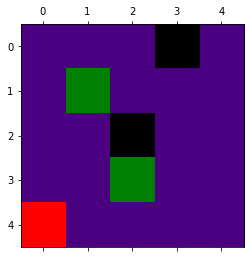

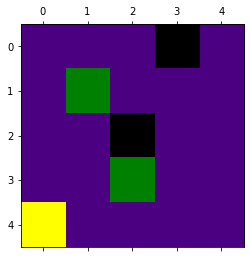

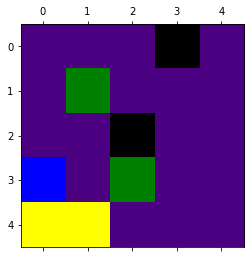

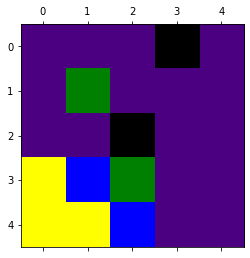

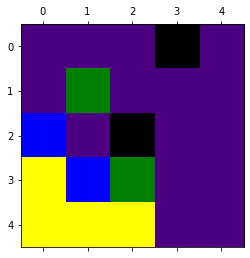

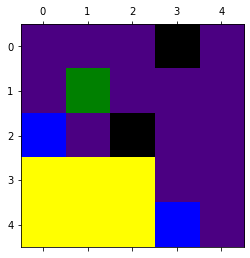

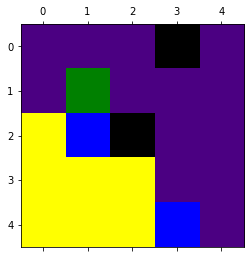

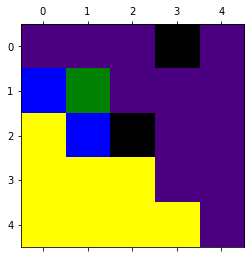

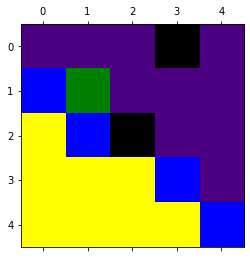

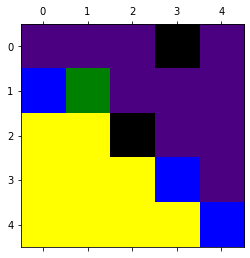

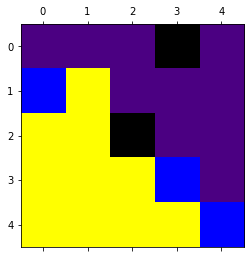

In [ ]:
BFS(n)

In [ ]:
def DFS(n):
  grid = np.zeros((n, n))
  #pred = np.zeros(n*n)
  for i in range(n):
    for j in range(n):
      grid[i][j] = 6
  block_loc = []
  print("Number of block states")
  bn = int(input())
  for i in range(bn):
    print("Enter location for block state (x,y)")
    x = int(input())
    y = int(input())
    block_loc.append([x,y])
    grid[x][y] = -1
  print("Starting coordinate (x,y)")
  x_start = int(input( )) 
  y_start =  int(input( )) 
  start = [x_start, y_start]
  grid[x_start][y_start] = 0
  print("Number of goal states")
  gn = int(input())
  gt = 1
  goals=[]
  for i in range(gn):
    print("Enter location for goal state (x,y)")
    gx = int(input())
    gy = int(input())
    goals.append([gx, gy])
    grid[gx][gy] = 1
  
  #predecessor matrix
  pred_mat = np.zeros([n,n])
  pred_mat[x_start][y_start] = -1

  priority_queue = []
  priority_queue.append(start)
  explored_list=[]
  cur=[]
  print(grid)
  #plotting grid
  cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'indigo'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.matshow(grid, cmap = cmap, norm = norm)
  while len(priority_queue)>0:

    #algo starts here
    cur = priority_queue.pop(0)
    explored_list.append(cur)
    if grid[cur[0]][cur[1]] ==1:
      grid[cur[0]][cur[1]] = 2
      x_new = cur[0]
      y_new = cur[1]
      print("YAAAY GOAL REACHED!")
      break
    else:
      grid[cur[0]][cur[1]] = 2

    print(grid)
    #plotting grid
    cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'indigo'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    plt.matshow(grid, cmap = cmap, norm = norm)

    #moving right
    if cur[0]<n and cur[1]+1<n and cur[0]>=0 and cur[1]+1>=0:
      x_new = cur[0]
      y_new = cur[1]+1
      
      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]

        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]

        grid[x_new][y_new] = 2
        print("YAAAY GOAL REACHED!")
        break

      #if point is unexpolored
      if grid[x_new][y_new]==6 or grid[x_new][y_new]==1:
        priority_queue.append([x_new, y_new])
        if grid[x_new][y_new]!=1: 
          grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]
    
    #moving up
    if cur[0]-1<n and cur[1]<n and cur[0]-1>=0 and cur[1]>=0:
      x_new = cur[0]-1
      y_new = cur[1]

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]
        grid[x_new][y_new] = 2
        print("YAAAY GOAL REACHED!")
        break

      #if point is unexpolored
      if grid[x_new][y_new]==6 or grid[x_new][y_new]==1:
        priority_queue.append([x_new, y_new])
        if grid[x_new][y_new]!=1: 
          grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]

    #moving left
    if cur[0]<n and cur[1]-1<n and cur[0]>=0 and cur[1]-1>=0:
      x_new = cur[0]
      y_new = cur[1]-1

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        #pred[n*x_new+y_new] = n*cur[0]+cur[1]
        grid[x_new][y_new] = 2
        print("YAAAY GOAL REACHED!")
        break
      
      #if point is unexpolored
      if grid[x_new][y_new]==6 or grid[x_new][y_new]==1:
        priority_queue.append([x_new, y_new])
        if grid[x_new][y_new]!=1: 
          grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]

    #moving down
    if cur[0]+1<n and cur[1]<n and cur[0]+1>=0 and cur[1]>=0:
      x_new = cur[0]+1
      y_new = cur[1]

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        #pred[n*x_new+y_new] = n*cur[0]+cur[1]
        grid[x_new][y_new] = 2
        print("YAAAY GOAL REACHED!")
        break
      #if point is unexpolored
      if grid[x_new][y_new]==6 or grid[x_new][y_new]==1:
        priority_queue.append([x_new, y_new])
        if grid[x_new][y_new]!=1: 
          grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        ##pred[n*x_new+y_new] = n*cur[0]+cur[1]
  
  print(grid)
  cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'indigo'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.matshow(grid, cmap = cmap, norm = norm)
    # plt.xticks(range(3), bounds)
    # plt.yticks(range(3), cmap)

  # print("x_new", x_new)
  # print("y_new", y_new)
  # print("gx", gx)
  # print("gy", gy)
  # print("goal states", goals)
  # print(pred_mat)
  for i in goals:
    x_temp = int(i[0]) #gx
    y_temp = int(i[1]) #gy
    # print(gx)
    # print(gy)
    #print("pred[x_temp*n+y_temp], ", pred_mat[x_temp*n+y_temp])
    for i in range(n):
      for j in range(n):
        pred_mat[i][j] = int(pred_mat[i][j])
    while pred_mat[x_temp][y_temp]!=-1:
      print(x_temp,",", y_temp,"<=")
      tempo = int(pred_mat[x_temp][y_temp])
      x_temp = int(tempo/n)
      y_temp = int(tempo%n)
    print(x_temp,",", y_temp)
    action = { "right" , "up", "down", "left" }
  return grid
 